# AI/ML NLP Sentiment Analysis of Data from Amazon Reviews
rating,date,variation,verified_reviews,feedback
When a company provide services or sell products to the general public, feedback from customers play a major role in the success of the product and the company at large. Giving a listening ear to customers help companies to bridge the gap between them and their customers to improve the quality of the product or service. 

In this project, I analyze amazon reviews of a product/service using Natural Language Processing (NLP) - Sentiment Analysis. The Machine Learning (ML) model I create provide an automated process (pipeline) for cleaning the text data, modeling, deploying and measuring the performance. The data used for our models have the features ratings, date, variation, verified_reviews, and feedback.


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False) 

# setting the style of the notebook to be monokai theme  
# this line of code is important to ensure that we are able to see the x and y axes clearly


### Loading the Data

In [4]:
amazon_reviews_df = pd.read_csv('amazon_reviews.csv')
amazon_reviews_df.head()

,rating,date,variation,verified_reviews,feedback
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1
4,5,31-Jul-18,Charcoal Fabric,Music,1


In [7]:
amazon_reviews_df['verified_reviews']

0                                           Love my Echo!
1                                               Loved it!
2       Sometimes while playing a game, you can answer...
3       I have had a lot of fun with this thing. My 4 ...
4                                                   Music
                              ...                        
3145    Perfect for kids, adults and everyone in betwe...
3146    Listening to music, searching locations, check...
3147    I do love these things, i have them running my...
3148    Only complaint I have is that the sound qualit...
3149                                                 Good
Name: verified_reviews, Length: 3150, dtype: object

### Count Plot For Ratings

<AxesSubplot:xlabel='rating', ylabel='count'>

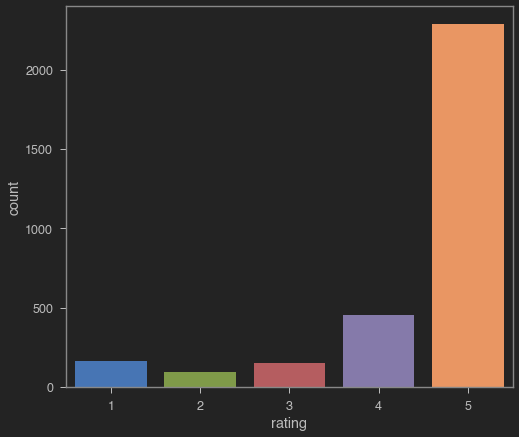

In [9]:
sns.countplot(x = amazon_reviews_df['rating']) 

### Count Plots of Positive & Negative Feedbacks

<AxesSubplot:xlabel='feedback', ylabel='count'>

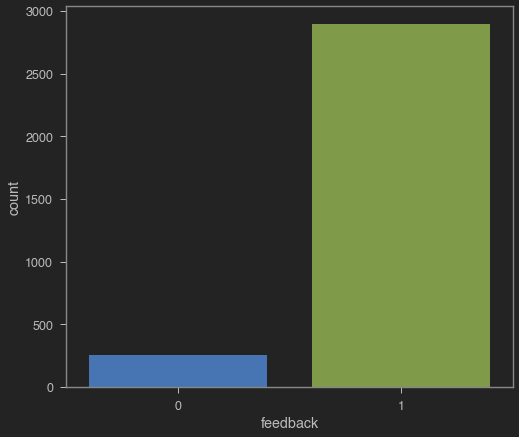

In [15]:
positive = amazon_reviews_df[amazon_reviews_df['feedback'] == 1]
negative = amazon_reviews_df[amazon_reviews_df['feedback'] == 0]

sns.countplot(x = amazon_reviews_df['feedback']) 

### Word Count Plot of Positive & Negative Feedbacks

In [16]:
positive_reviews = positive['verified_reviews'].tolist()
positive_reviews_as_one_string =" ".join(positive_reviews)
positive_reviews_as_one_string

'Love my Echo! Loved it! Sometimes while playing a game, you can answer a question correctly but Alexa says you got it wrong and answers the same as you.  I like being able to turn lights on and off while away from home. I have had a lot of fun with this thing. My 4 yr old learns about dinosaurs, i control the lights and play games like categories. Has nice sound when playing music as well. Music I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do. Without having a cellphone, I cannot use many of her features. I have an iPad but do not see that of any use.  It IS a great alarm.  If u r almost deaf, you can hear her alarm in the bedroom from out in the living room, so that is reason enough to keep her.It is fun to ask random questions to hear her response.  She does not seem to be very smartbon politics yet. I think this is the 5th one I\'ve purchased. I\'m working on 

In [17]:
negative_reviews = negative['verified_reviews'].tolist()
negative_reviews_as_one_string =" ".join(negative_reviews)
negative_reviews_as_one_string

'It\'s like Siri, in fact, Siri answers more accurately then Alexa.  I don\'t see a real need for it in my household, though it was a good bargain on prime day deals. Sound is terrible if u want good music too get a bose Not much features. Stopped working after 2 weeks ,didn\'t follow commands!? Really fun when it was working? Sad joke. Worthless. Really disappointed Alexa has to be plug-in to wall socket all the time.  My fault for not checking this, but made the assumption that a company has technologically advanced as Amazon would sell this product with a rechargeable battery.  If I could return it, I would as my Apple music and boom speaker give me more flexibility the Alexa. It\'s got great sound and bass but it doesn\'t work all of the time. Its still hot or miss when it recognizes things I am not super impressed with Alexa. When my Prime lapsed, she wouldn\'t play anything. She isn\'t smart enough to differentiate among spotify accounts so we can\'t use it for that either. She r

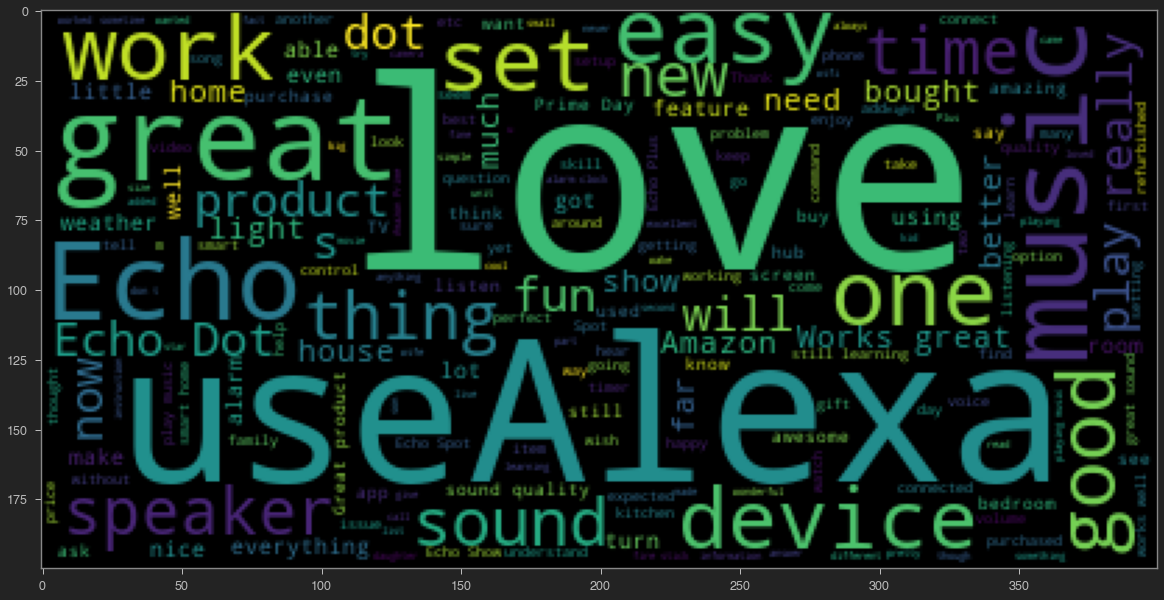

In [18]:
from wordcloud import WordCloud

plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(positive_reviews_as_one_string))

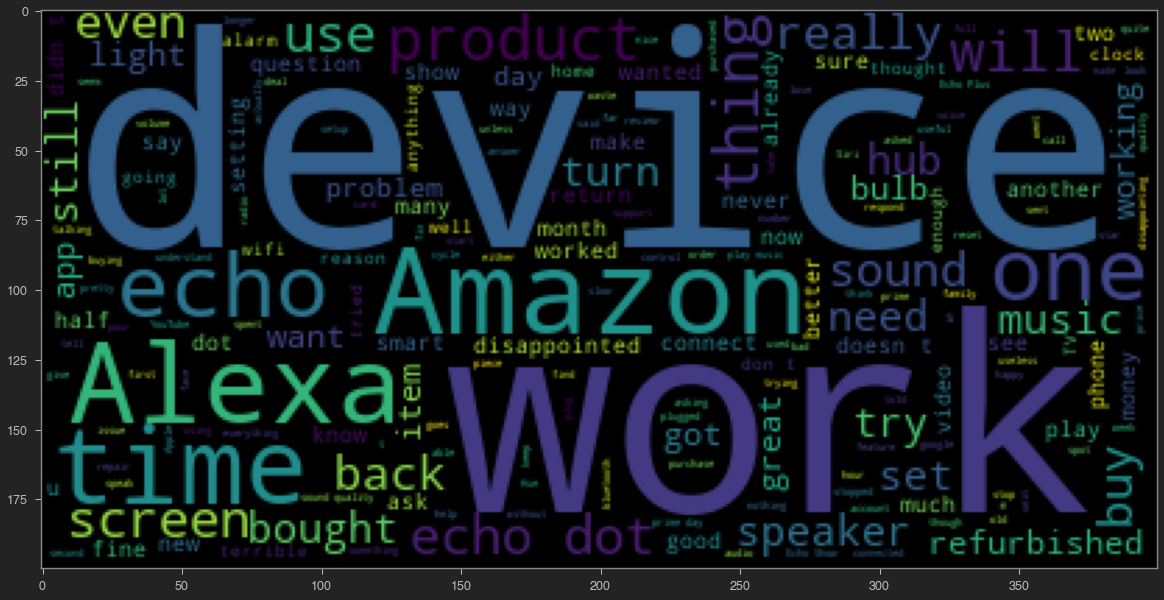

In [19]:
plt.figure(figsize=(20,20))
plt.imshow(WordCloud().generate(negative_reviews_as_one_string))

### Determining Length of Characters Under the Verified_reviews Column

In [11]:
amazon_reviews_df['length'] = amazon_reviews_df['verified_reviews'].apply(len)
amazon_reviews_df.head()

,rating,date,variation,verified_reviews,feedback,length
0,5,31-Jul-18,Charcoal Fabric,Love my Echo!,1,13
1,5,31-Jul-18,Charcoal Fabric,Loved it!,1,9
2,4,31-Jul-18,Walnut Finish,"Sometimes while playing a game, you can answer...",1,195
3,5,31-Jul-18,Charcoal Fabric,I have had a lot of fun with this thing. My 4 ...,1,172
4,5,31-Jul-18,Charcoal Fabric,Music,1,5


### Statistical Summary 

In [13]:
amazon_reviews_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3150 entries, 0 to 3149
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   rating            3150 non-null   int64 
 1   date              3150 non-null   object
 2   variation         3150 non-null   object
 3   verified_reviews  3150 non-null   object
 4   feedback          3150 non-null   int64 
 5   length            3150 non-null   int64 
dtypes: int64(3), object(3)
memory usage: 147.8+ KB


In [14]:
amazon_reviews_df.describe()

,rating,feedback,length
count,3150.000000,3150.000000,3150.000000
mean,4.463175,0.918413,132.049524
std,1.068506,0.273778,182.099952
min,1.000000,0.000000,1.000000
25%,4.000000,1.000000,30.000000
50%,5.000000,1.000000,74.000000
75%,5.000000,1.000000,165.000000
max,5.000000,1.000000,2851.000000


### Histogram for the Length Variable

<AxesSubplot:ylabel='Frequency'>

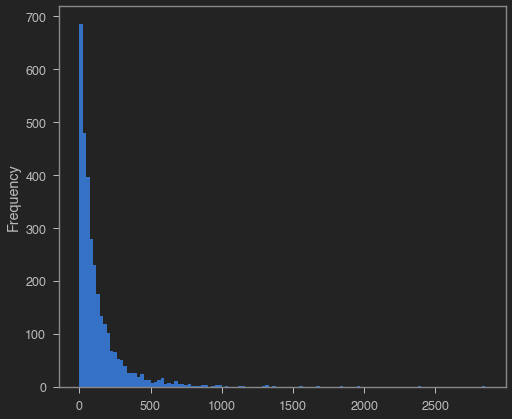

In [12]:
amazon_reviews_df['length'].plot(bins=120, kind='hist') 

### Dropping Some Features

In [23]:
amazon_reviews = amazon_reviews_df.drop(['rating', 'date', 'variation', 'length'], axis = 1)

In [24]:
amazon_reviews.head()

,verified_reviews,feedback
0,Love my Echo!,1
1,Loved it!,1
2,"Sometimes while playing a game, you can answer...",1
3,I have had a lot of fun with this thing. My 4 ...,1
4,Music,1


### Pipeline to Remove Punctuations & Stopwords

In [32]:
import string
string.punctuation

import nltk
#nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords.words('english')

def text_cleaning(text):
    Text_punc_removed = [char for char in text if char not in string.punctuation]
    Text_punc_removed_join = ''.join(Text_punc_removed)
    Text_punc_removed_join_clean = [word for word in Text_punc_removed_join.split() if word.lower() not in stopwords.words('english')]
    return Text_punc_removed_join_clean

In [33]:
amazon_reviews_clean = amazon_reviews['verified_reviews'].apply(text_cleaning)

#### original review

In [34]:
print(amazon_reviews['verified_reviews'][5]) 

I received the echo as a gift. I needed another Bluetooth or something to play music easily accessible, and found this smart speaker. Can’t wait to see what else it can do.


#### cleaned review

In [35]:
print(amazon_reviews_clean[5]) 

['received', 'echo', 'gift', 'needed', 'another', 'Bluetooth', 'something', 'play', 'music', 'easily', 'accessible', 'found', 'smart', 'speaker', 'Can’t', 'wait', 'see', 'else']


### Count Vectorization of Reviews ( a.k.a Encoding Strings in Reviews into Numbers )

In [36]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer(analyzer = text_cleaning)
amazon_reviews_countvectorizer = vectorizer.fit_transform(amazon_reviews['verified_reviews'])

In [37]:
print(vectorizer.get_feature_names())

['072318', '1', '10', '100', '1000', '100X', '1010', '1030pm', '11', '1100sf', '1220', '129', '12am', '15', '150', '19', '1964', '1990s', '1990’s', '1GB', '1rst', '1st', '2', '20', '200', '2000', '2017', '2030', '229', '23', '2448', '247', '24GHZ', '24ghz', '25', '29', '299', '2999', '2Original', '2nd', '2or', '2package', '3', '30', '300', '30so', '334', '34', '342nd', '3434', '34A34', '34Alexa', '34Alexa34', '34Certified', '34Computer34', '34Dot34', '34Drop', '34First', '34Hub', '34I', '34Im', '34NEVER', '34Philips', '34Play', '34Second', '34Skills34', '34Tell', '34The', '34Things', '34Thongs', '34Try', '34Whats', '34alexa34', '34card34', '34cycle', '34cycle34', '34fixes34', '34fun34', '34group34', '34hear34', '34hmm', '34hmmm', '34it34', '34late', '34learn', '34light34', '34lights34', '34listen34', '34minor', '34outlet34', '34personal34', '34she34', '34show', '34smart', '34smart34', '34sorry', '34spying34', '34the', '34thick34', '34things', '34this', '34trouble', '34try', '34turn', '

In [39]:
print(amazon_reviews_countvectorizer.toarray())  

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [40]:
amazon_reviews_countvectorizer.shape

(3150, 5211)

In [41]:
amazon_reviews = pd.DataFrame(amazon_reviews_countvectorizer.toarray())

In [45]:
x = amazon_reviews

In [44]:
y = amazon_reviews_df['feedback']

### Training and Testing AI/ML Models

In [46]:
from sklearn.model_selection import train_test_split

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.3)

### 1. Naive Bayes (NB) Classifier Model

In [48]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

NB_classifier = MultinomialNB()
NB_classifier.fit(xtrain, ytrain)

MultinomialNB()

#### Predicting the Test Set Using The Naive Bayes Classifier

<AxesSubplot:>

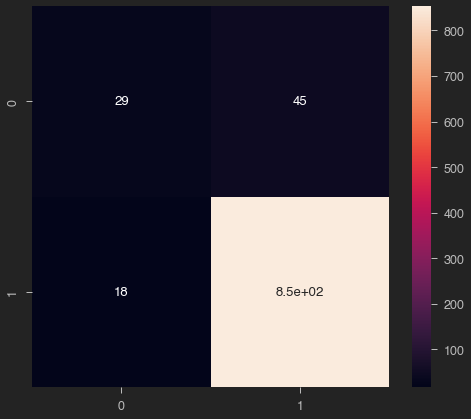

In [49]:
predict_ytest = NB_classifier.predict(xtest)
cm1 = confusion_matrix(ytest, predict_ytest)
sns.heatmap(cm1, annot=True)

print(classification_report(ytest, predict_ytest))

### 2. Logistic Regression (LR) Model

<AxesSubplot:>

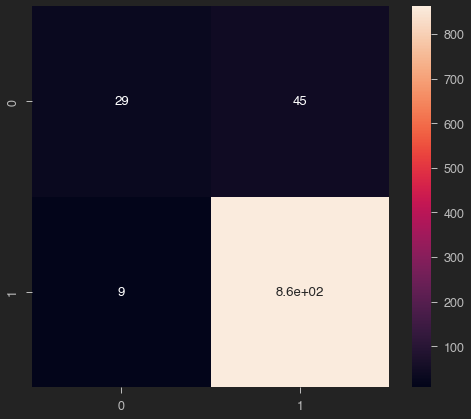

In [58]:
from sklearn.linear_model import LogisticRegression

LR_classifier = LogisticRegression()
LR_classifier.fit(xtrain, ytrain)

#### Predicting the Test Set Using The Logistic Regression Model

              precision    recall  f1-score   support

           0       0.76      0.39      0.52        74
           1       0.95      0.99      0.97       871

    accuracy                           0.94       945
   macro avg       0.86      0.69      0.74       945
weighted avg       0.94      0.94      0.93       945



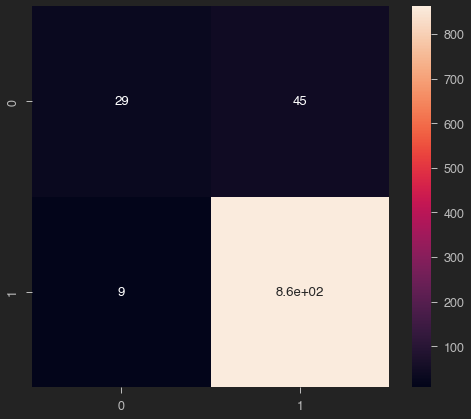

In [60]:
ytest_pred = LR_classifier.predict(xtest)

cm2 = confusion_matrix(ytest, ytest_pred)
sns.heatmap(cm2, annot=True)

print(classification_report(ytest, ytest_pred))

### 3. Gradient Boosting (GB) Model

In [61]:
from sklearn.ensemble import GradientBoostingClassifier

GB_classifier = GradientBoostingClassifier()
GB_classifier.fit(xtrain, ytrain)

GradientBoostingClassifier()

#### Predicting the Test Set Using The Gradient Boosting Model

              precision    recall  f1-score   support

           0       0.60      0.16      0.26        74
           1       0.93      0.99      0.96       871

    accuracy                           0.93       945
   macro avg       0.77      0.58      0.61       945
weighted avg       0.91      0.93      0.91       945



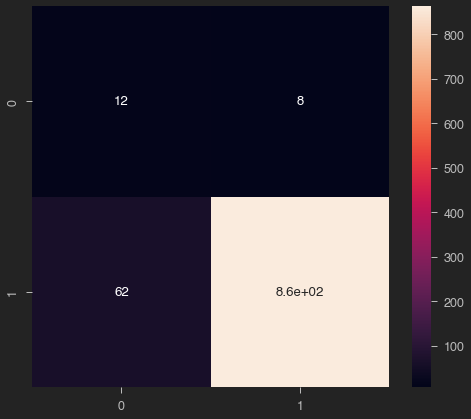

In [62]:
ytestpred = GB_classifier.predict(xtest)

cm3 = confusion_matrix(ytestpred, ytest)
sns.heatmap(cm3, annot = True)

print(classification_report(ytest, ytestpred))